# P2 Continuous Control

Don't forget that you shouild be running in the `drlnd` conda environment and you should have chosen your ipyrthon kernel to be `drlnd` as well

In [1]:
from collections import deque
from unityagents import UnityEnvironment

## Open environment and view the space

In [2]:
# Instantiate the Unity environment with the reacher simulation of 20 agents
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]      
action_size = brain.vector_action_space_size     
state = env_info.vector_observations[0]
state_size = len(state)
print("State space:", state_size, "\nAction space", action_size, "\n Initial State ", state )

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State space: 33 
Action space 4 
 Initial State  [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## Run without training

In [3]:
import torch
import numpy as np

def run(n_episodes=20):
    scores_moving_win = deque(maxlen=100)
    total_scores = []
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(20) # One score per agent
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        agent.reset()
        t = 0
        while True:
            with torch.no_grad():
                actions = agent.act(states)
            env_info = env.step(actions)[brain_name]      
            next_states = env_info.vector_observations            
            rewards = env_info.rewards
            scores += rewards
            dones = env_info.local_done 
            states = next_states
            if np.all(dones):
                break
            t += 1

        mean_score = np.mean(scores)
        scores_moving_win.append(mean_score)
        total_scores.append(mean_score)
        average_score_moving_win = np.mean(scores_moving_win)
        
        print('\rEpisode {}\tAverage Score: {:.2f} \t Min:{:.2f} \t Max:{:.2f}'.format(
            i_episode, average_score_moving_win,
            np.min(scores), np.max(scores)))
    return total_scores

In [4]:
# Instantiate just the actor 
from agent import Agent

agent = Agent(state_size=state_size, action_size=action_size)
agent.actor_local.load_state_dict(torch.load('final_actor.pth'))
agent.actor_local.eval()

# run
scores = run()

cuda:0
Episode 1	Average Score: 36.12 	 Min:16.80 	 Max:39.58
Episode 2	Average Score: 36.03 	 Min:30.56 	 Max:39.55
Episode 3	Average Score: 36.07 	 Min:32.01 	 Max:39.58
Episode 4	Average Score: 36.13 	 Min:27.06 	 Max:39.42
Episode 5	Average Score: 36.14 	 Min:26.39 	 Max:39.65
Episode 6	Average Score: 36.15 	 Min:29.49 	 Max:39.44
Episode 7	Average Score: 36.02 	 Min:26.38 	 Max:39.36
Episode 8	Average Score: 36.15 	 Min:29.94 	 Max:39.45
Episode 9	Average Score: 36.17 	 Min:31.66 	 Max:39.32
Episode 10	Average Score: 36.02 	 Min:17.87 	 Max:39.53
Episode 11	Average Score: 36.18 	 Min:35.51 	 Max:39.52
Episode 12	Average Score: 36.22 	 Min:29.99 	 Max:39.49
Episode 13	Average Score: 36.16 	 Min:29.32 	 Max:39.06
Episode 14	Average Score: 36.22 	 Min:31.94 	 Max:39.56
Episode 15	Average Score: 36.23 	 Min:29.03 	 Max:39.51
Episode 16	Average Score: 36.21 	 Min:29.11 	 Max:39.42
Episode 17	Average Score: 36.22 	 Min:29.42 	 Max:39.57
Episode 18	Average Score: 36.20 	 Min:30.42 	 Max:

## Plot run results

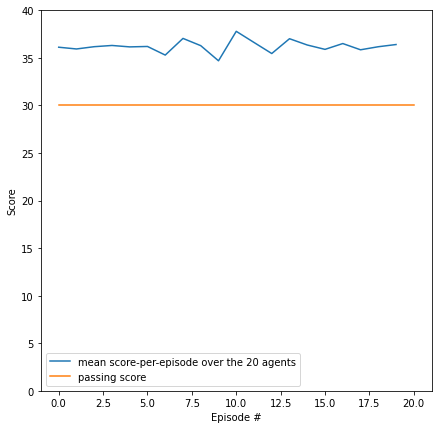

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot([0,len(scores)],[30, 30])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['mean score-per-episode over the 20 agents',
            'passing score'])
plt.ylim(bottom=0, top=40)
plt.show()

In [6]:
env.close()